In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, \
classification_report 

from keras.models import Sequential, save_model
from keras.layers import Dense, Dropout, Input, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import L2

pd.set_option('display.max_columns', None)

In [2]:
# Read the compressed CSV file into a DataFrame
df = pd.read_csv('../data/processed/processed_data.csv.zip', compression='zip')

In [3]:
df.head()

,char_1,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,activity_type_labeled,group_1_labeled,activity_category_type 2,activity_category_type 3,activity_category_type 4,activity_category_type 5,activity_category_type 6,activity_category_type 7,char_2_type 2,char_2_type 3,char_3_type 10,char_3_type 11,char_3_type 12,char_3_type 13,char_3_type 14,char_3_type 15,char_3_type 16,char_3_type 17,char_3_type 18,char_3_type 19,char_3_type 2,char_3_type 20,char_3_type 21,char_3_type 22,char_3_type 23,char_3_type 24,char_3_type 25,char_3_type 26,char_3_type 27,char_3_type 28,char_3_type 29,char_3_type 3,char_3_type 30,char_3_type 31,char_3_type 32,char_3_type 33,char_3_type 34,char_3_type 35,char_3_type 36,char_3_type 37,char_3_type 38,char_3_type 39,char_3_type 4,char_3_type 40,char_3_type 41,char_3_type 42,char_3_type 44,char_3_type 5,char_3_type 6,char_3_type 7,char_3_type 8,char_3_type 9,char_4_type 10,char_4_type 11,char_4_type 12,char_4_type 13,char_4_type 14,char_4_type 15,char_4_type 16,char_4_type 17,char_4_type 18,char_4_type 19,char_4_type 2,char_4_type 20,char_4_type 21,char_4_type 22,char_4_type 23,char_4_type 24,char_4_type 25,char_4_type 3,char_4_type 4,char_4_type 5,char_4_type 6,char_4_type 7,char_4_type 8,char_4_type 9,char_5_type 2,char_5_type 3,char_5_type 4,char_5_type 5,char_5_type 6,char_5_type 7,char_5_type 8,char_5_type 9,char_6_type 2,char_6_type 3,char_6_type 4,char_6_type 5,char_6_type 6,char_6_type 7,char_7_type 10,char_7_type 11,char_7_type 12,char_7_type 13,char_7_type 14,char_7_type 15,char_7_type 16,char_7_type 17,char_7_type 18,char_7_type 19,char_7_type 2,char_7_type 20,char_7_type 21,char_7_type 22,char_7_type 23,char_7_type 24,char_7_type 25,char_7_type 3,char_7_type 4,char_7_type 5,char_7_type 6,char_7_type 7,char_7_type 8,char_7_type 9,char_8_type 2,char_8_type 3,char_8_type 4,char_8_type 5,char_8_type 6,char_8_type 7,char_8_type 8,char_9_type 2,char_9_type 3,char_9_type 4,char_9_type 5,char_9_type 6,char_9_type 7,char_9_type 8,char_9_type 9,activity_day_of_week,activity_month,activity_year,day_of_week,month,year,outcome
0,0.321498,1.773358,-0.510172,-0.553939,1.364357,1.708662,-0.59582,1.651576,-0.623169,-0.464462,-0.610006,-0.51366,1.650164,-0.606963,-0.630055,-0.469734,-0.682679,-0.449736,1.812214,1.636666,-0.441534,1.976494,1.65069,-0.605081,-0.52191,1.375441,1.991719,1.430494,-0.609448,-0.387427,2.475744,-0.678519,-0.836594,-0.492843,3.096957,-0.536227,-0.044038,-0.037932,1.322732,-1.089237,-0.102977,-0.288006,-0.078999,-0.051853,-0.033628,-0.16714,-0.04461,-0.069591,-0.08043,-0.131241,-0.325528,-0.078739,-0.069878,-0.016291,-0.022542,-0.082457,-0.016375,-0.06708,-0.024048,-0.050226,-0.051334,-0.076916,-0.04,-0.035714,-0.022824,-0.015087,-0.010603,-0.011666,-0.013527,-0.008318,-0.008039,-0.011269,-0.362307,-0.681785,-0.004213,-0.001908,-0.001785,2.991529,-0.187336,-0.27643,-0.11085,-0.190264,-0.124229,-0.038748,-0.101209,-0.05198,-0.050503,-0.168954,-0.10116,-0.027087,-0.064131,-0.049515,-0.339356,-0.032707,-0.053452,-0.045002,-0.030364,-0.026328,-0.681785,-0.132989,-0.102336,3.208398,-0.5437,-0.305439,-0.160827,-0.123222,-0.439528,-0.260443,-0.359898,2.358908,-0.241851,-0.271499,-0.20849,-0.681785,-0.196319,1.517148,-0.559953,-0.291287,-0.109651,-0.046299,-0.118661,3.601344,-0.196903,-0.227825,-0.170504,-0.139709,-0.189276,-0.244257,-0.173058,-0.189786,-0.217071,-0.171067,-0.126792,-0.120178,-0.113483,-0.193741,-0.070728,-0.155625,-0.212347,-0.133502,-0.140753,-0.188528,-0.369091,-0.363824,1.487125,-0.853175,-0.257948,-0.178381,-0.232045,-0.167172,-0.17613,1.734399,-0.891136,-0.270056,-0.185995,-0.223042,-0.17096,-0.204021,-0.203015,1.134794,0.307376,1.023398,-1.401177,-0.228608,-0.967426,0
1,0.321498,1.773358,-0.510172,-0.553939,1.364357,1.708662,-0.59582,1.651576,-0.623169,-0.464462,-0.610006,-0.51366,1.650164,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Columns: 166 entries, char_1 to outcome
dtypes: float64(165), int64(1)
memory usage: 2.7 GB


In [5]:
# Select features and label
X = df.drop(columns=['outcome'], axis=1)
y = df['outcome']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Columns: 165 entries, char_1 to year
dtypes: float64(165)
memory usage: 2.7 GB


In [7]:
# Function to downcast float columns to the smallest possible float type
def downcast_floats(df):
    # Iterate over each column in the DataFrame
    for col in df.columns:
        if pd.api.types.is_float_dtype(df[col]):
            # Downcast the column to the smallest possible float type
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

def downcast_labels(y):
    return pd.to_numeric(y, downcast='integer')

X = downcast_floats(X)
y = downcast_labels(y)

In [8]:
# Split dataset into train and test with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Split the training dataset further into training and validation with the ratio 90:10
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [9]:
# Check the shape of the traning, testing and validation sets
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of X_val:",X_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of X_train: (1582048, 165)
Shape of X_test: (439459, 165)
Shape of X_val: (175784, 165)
Shape of y_train: (1582048,)
Shape of y_test: (439459,)
Shape of y_val: (175784,)


### Model Building

#### Baseline Model Architecture:

An architecture with one hidden layer

In [10]:
# Define the model
baseline_model = Sequential()

# Set up the input dimension
baseline_model.add(Input(shape=(165,)))

# Input layer
baseline_model.add(Dense(64, activation='relu'))

# Output layer
baseline_model.add(Dense(1, activation='sigmoid'))

# Compile the model
baseline_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                10624     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10689 (41.75 KB)
Trainable params: 10689 (41.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Use early stopping to prevent overfitting and train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                             epochs=50, batch_size=512, callbacks=[early_stopping], verbose=1)


Epoch 1/50
3090/3090 [==============================] - 5s 1ms/step - loss: 0.2811 - accuracy: 0.8747 - val_loss: 0.2527 - val_accuracy: 0.8875
Epoch 2/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2417 - accuracy: 0.8939 - val_loss: 0.2329 - val_accuracy: 0.8990
Epoch 3/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2288 - accuracy: 0.9010 - val_loss: 0.2268 - val_accuracy: 0.9007
Epoch 4/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2211 - accuracy: 0.9048 - val_loss: 0.2185 - val_accuracy: 0.9064
Epoch 5/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2161 - accuracy: 0.9076 - val_loss: 0.2158 - val_accuracy: 0.9076
Epoch 6/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2120 - accuracy: 0.9097 - val_loss: 0.2127 - val_accuracy: 0.9096
Epoch 7/50
3090/3090 [==============================] - 4s 1ms/step - loss: 0.2086 - accuracy: 0.9115 - val_loss: 0.2086 - val_accuracy:

In [12]:
# Evaluate Baseline Model
val_predictions = (baseline_model.predict(X_val) > 0.5).astype("int32")
baseline_accuracy = accuracy_score(y_val, val_predictions)
print(f'Baseline Model Accuracy: {baseline_accuracy:.4f}')

5494/5494 [==============================] - 3s 549us/step
Baseline Model Accuracy: 0.9214


### Designing A DNN for Classification Problem

In [13]:
# Define the DNN model
def build_dnn_model(input_shape):
    model = Sequential()

    # Define the inpute shape
    model.add(Input(shape=(input_shape,)))

    # Input layer
    model.add(Dense(512, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # First hidden layers
    model.add(Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Get the input shape from the training data
input_shape = X_train.shape[1]

# Build the model
dnn_model = build_dnn_model(input_shape=input_shape)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = dnn_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=15,
                        batch_size=512,
                        callbacks=[early_stopping])

Epoch 1/15
3090/3090 [==============================] - 30s 9ms/step - loss: 0.2683 - accuracy: 0.8794 - val_loss: 0.2122 - val_accuracy: 0.9058
Epoch 2/15
3090/3090 [==============================] - 30s 10ms/step - loss: 0.2115 - accuracy: 0.9062 - val_loss: 0.1714 - val_accuracy: 0.9264
Epoch 3/15
3090/3090 [==============================] - 28s 9ms/step - loss: 0.1875 - accuracy: 0.9181 - val_loss: 0.1509 - val_accuracy: 0.9365
Epoch 4/15
3090/3090 [==============================] - 28s 9ms/step - loss: 0.1735 - accuracy: 0.9250 - val_loss: 0.1376 - val_accuracy: 0.9442
Epoch 5/15
3090/3090 [==============================] - 29s 9ms/step - loss: 0.1629 - accuracy: 0.9300 - val_loss: 0.1304 - val_accuracy: 0.9468
Epoch 6/15
3090/3090 [==============================] - 29s 9ms/step - loss: 0.1561 - accuracy: 0.9334 - val_loss: 0.1229 - val_accuracy: 0.9515
Epoch 7/15
3090/3090 [==============================] - 30s 10ms/step - loss: 0.1505 - accuracy: 0.9361 - val_loss: 0.1167 - val_

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Improved DNN Model Accuracy: {test_accuracy:.4f}")

13734/13734 [==============================] - 14s 982us/step - loss: 0.0953 - accuracy: 0.9632
Improved DNN Model Accuracy: 0.9632


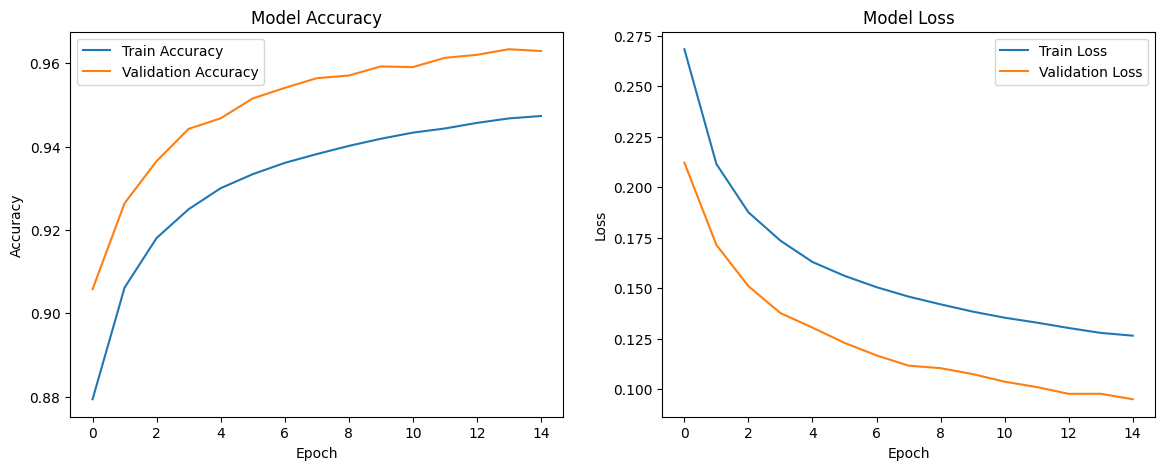

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

5494/5494 [==============================] - 5s 893us/step


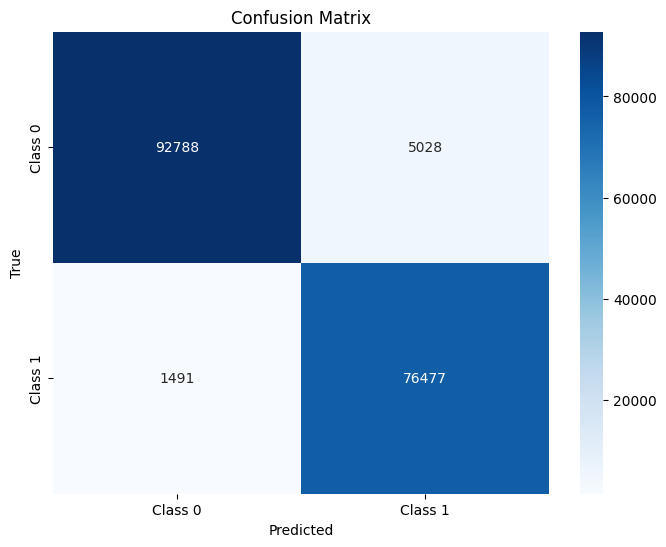

In [22]:
y_val_pred = dnn_model.predict(X_val)
y_val_pred_class = (y_val_pred > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model correctly classified most of the positive and negative cases, with a relatively low number of false positives and false negatives.

In [40]:
# Generate the classification report
report = classification_report(y_val, y_val_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     97816
           1       0.94      0.98      0.96     77968

    accuracy                           0.96    175784
   macro avg       0.96      0.96      0.96    175784
weighted avg       0.96      0.96      0.96    175784



**Classification Report**
- **Precision:** High precision (0.98 for class 0 and 0.94 for class 1) indicates that when the model predicts a class, it’s usually correct.

- **Recall:** High recall (0.95 for class 0 and 0.98 for class 1) suggests that the model successfully identifies most of the actual instances of each class.

- **F1-Score:** The F1-scores (0.97 for class 0 and 0.96 for class 1) show a good balance between precision and recall.

- **Overall Accuracy:** 96% accuracy reflects strong overall performance.

- **Macro and Weighted Averages:** Both macro and weighted averages are 0.96, indicating balanced performance across classes.

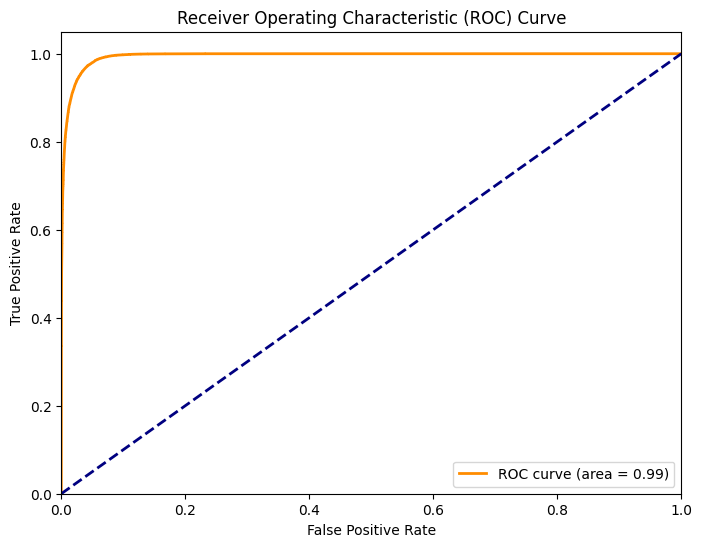

In [31]:
# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9945489843319698


- **ROC AUC:** A value of 0.9945 indicates that the model has excellent discriminatory power, effectively distinguishing between the positive and negative classes.

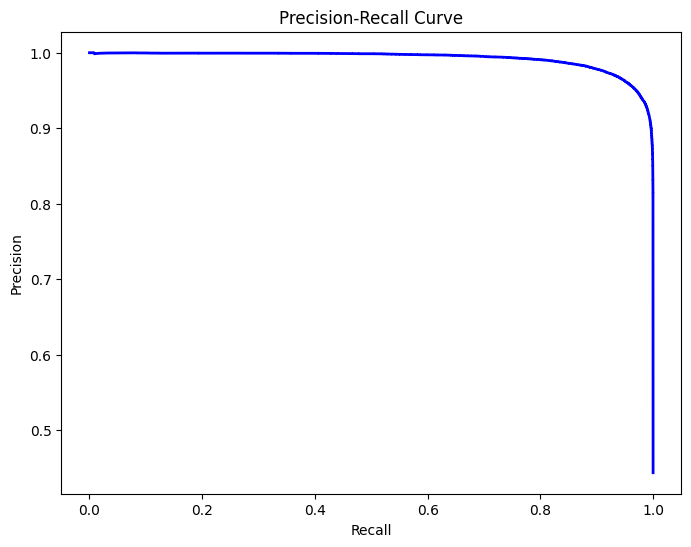

In [34]:
# Compute the precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [47]:
# Save the model
save_model(dnn_model, '../models/red_hat_model.keras')

# Save only weights
dnn_model.save_weights('../models/red_hat_weights.keras')